<a href="https://colab.research.google.com/github/NarsheS/colab/blob/main/trabalho_n4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Carregue os dados
def processar_dados(data_path):
    df = pd.read_csv(data_path)
    df['Data'] = pd.to_datetime(df['Data'])
    df.set_index('Data', inplace=True)
    return df

# Deixei esse path pois era o qual estava usando, da pra colocar um input tbm
# mas assim a gente vai direto ao ponto, so colocar o path do arquivo
data_path = "/content/drive/MyDrive/exemplo.csv"
df_processado = processar_dados(data_path)

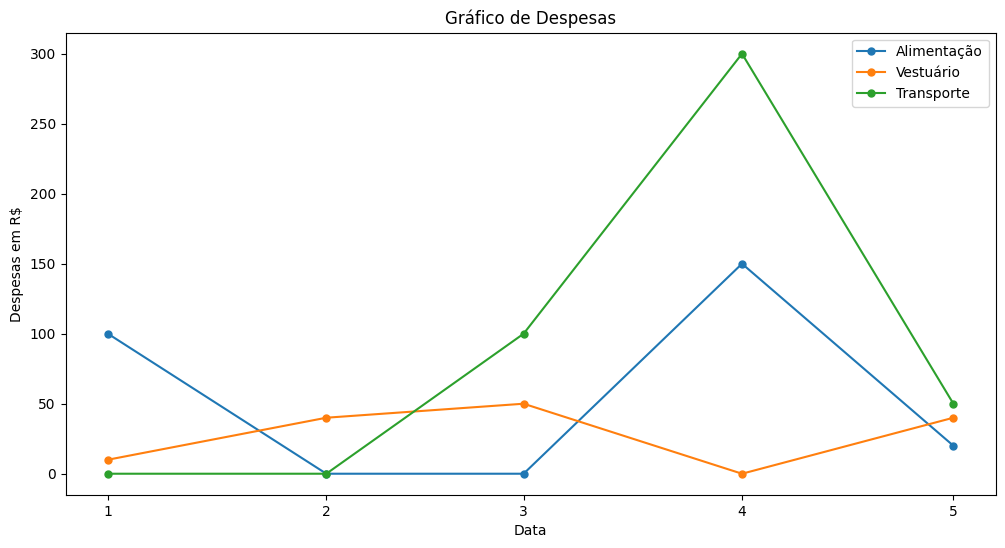

In [ ]:
# Primeiro gráfico: Dados originais
class GraficoDespesas:
    def __init__(self, data_frame):
        self.df = data_frame

    def plot_grafico_despesas(self):
        fig, ax1 = plt.subplots(figsize=(12, 6))

        for col in self.df.columns:
            plt.plot(self.df.index, self.df[col], label=col, marker='o', markersize=5)

        ax1.set_title('Gráfico de Despesas')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Despesas em R$')
        ax1.legend()

        unique_months = self.df.index.to_period('M').unique()
        ax1.set_xticks(self.df.index)

        mes_numeros = [m.month for m in unique_months]
        ax1.set_xticklabels([f'{mes}' for mes in mes_numeros])

        plt.show()

grafico = GraficoDespesas(df_processado)
grafico.plot_grafico_despesas()

In [ ]:
# Função para realizar regressão linear e criar gráfico
class RegressaoLinearGrafico:
    def __init__(self, data_frame):
        self.df = data_frame

    def regressao_e_grafico(self, variavel, cor_linha, titulo):
        modelo = LinearRegression()
        X = pd.to_numeric(self.df.index)
        y = self.df[variavel]
        modelo.fit(X.values.reshape(-1, 1), y)
        previsoes = modelo.predict(X.values.reshape(-1, 1))

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(self.df.index, y, label=variavel, marker='o', markersize=5)
        ax.plot(self.df.index, previsoes, label=f'Regressão {variavel}', linestyle='--', color=cor_linha)
        ax.set_title(titulo)
        ax.set_xlabel('Data')
        ax.set_ylabel('Despesas em R$')
        ax.legend()

        unique_months = self.df.index.to_period('M').unique()
        ax.set_xticks(self.df.index)

        mes_numeros = [m.month for m in unique_months]
        ax.set_xticklabels([f'{mes}' for mes in mes_numeros])

        plt.show()

# Vou deixar o arquivo pre-set aqui, mas pode ser usado um input como anteriormente.
# Entretanto, meu objetivo aqui era mostrar com os mesmos dados apresentados.
# Caso faça com outros dados, ao usar regressao_e_grafico, deve dar a variavel correta ao respectivo arquivo.
data_path = '/content/drive/MyDrive/exemplo.csv'
df_processado = processar_dados(data_path)

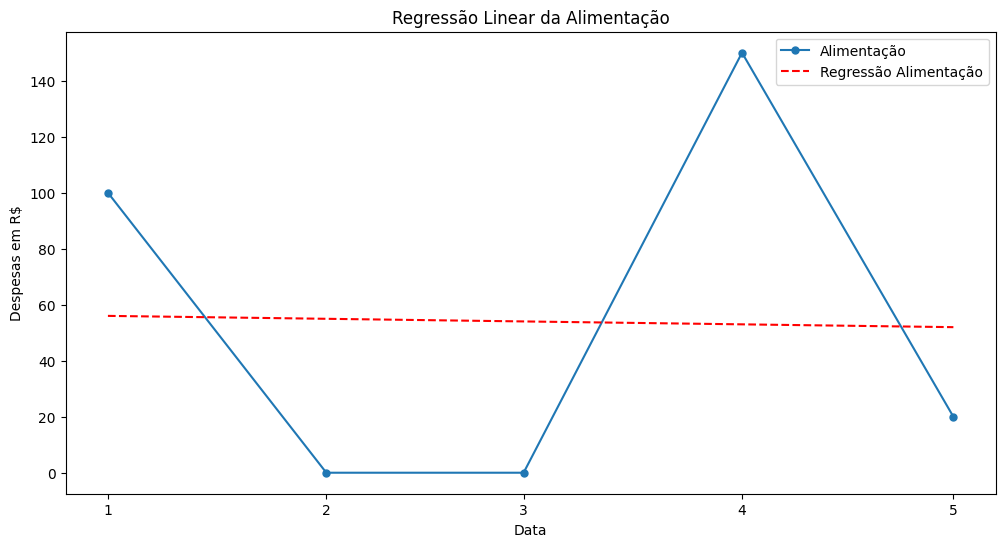

In [ ]:
# Regressão linear Alimentação
regressao_grafico = RegressaoLinearGrafico(df_processado)
regressao_grafico.regressao_e_grafico('Alimentação', 'red', 'Regressão Linear da Alimentação')

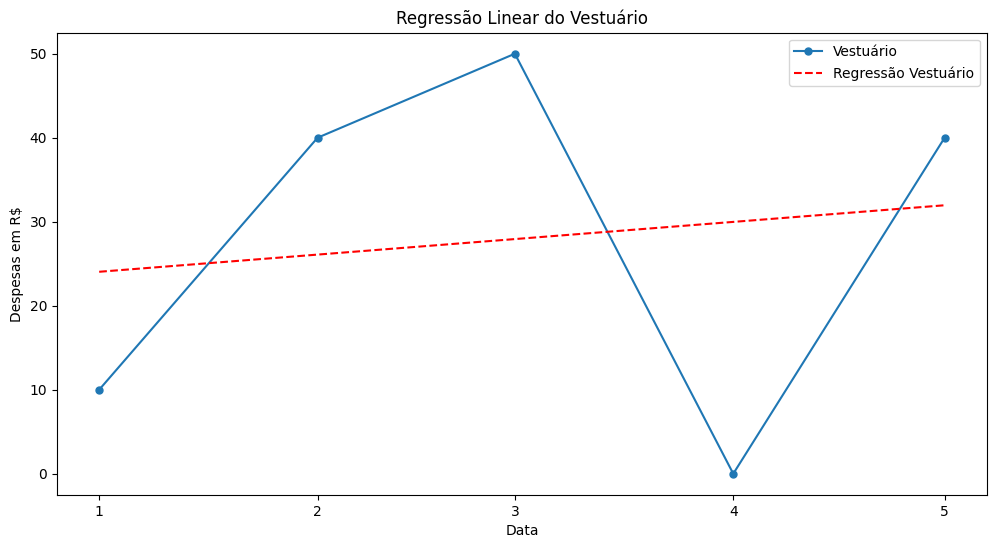

In [ ]:
# Regressão linear Vestuário
regressao_grafico = RegressaoLinearGrafico(df_processado)
regressao_grafico.regressao_e_grafico('Vestuário', 'red', 'Regressão Linear do Vestuário')

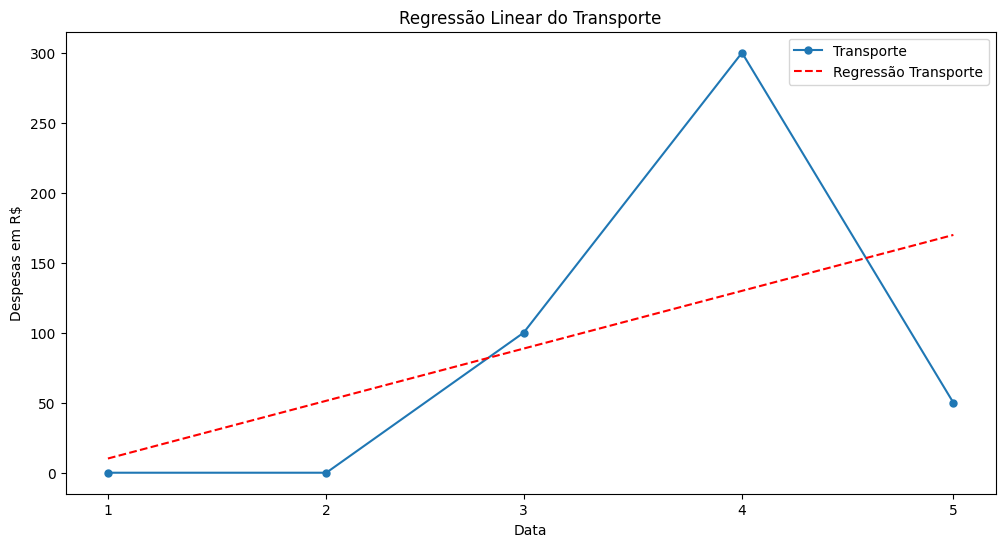

In [ ]:
# Regressão linear Transporte
regressao_grafico = RegressaoLinearGrafico(df_processado)
regressao_grafico.regressao_e_grafico('Transporte', 'red', 'Regressão Linear do Transporte')